In [1]:
import pandas as pd
import numpy as np


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
holidays = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/holidays_events.csv')
chosen_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/choosen_df.csv')

In [4]:
chosen_df

,date,store_nbr,item_nbr,unit_sales,onpromotion,family,class,perishable,dcoilwtico,city,state,type,cluster,year,month,day
0,2016-01-02,1,114790,7.0,0,12,1004,0,False,0,0,3,13,2016,1,2
1,2016-01-02,1,215331,8.0,0,12,1040,0,False,0,0,3,13,2016,1,2
2,2016-01-02,1,222879,6.0,0,12,1058,0,False,0,0,3,13,2016,1,2
3,2016-01-02,1,261052,6.0,0,12,1072,0,False,0,0,3,13,2016,1,2
4,2016-01-02,1,261053,3.0,0,12,1072,0,False,0,0,3,13,2016,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208353,2017-08-15,49,1036689,48.0,0,12,1040,0,47.57,0,0,0,11,2017,8,15
208354,2017-08-15,49,1146795,47.0,1,12,1040,0,47.57,0,0,0,11,2017,8,15
208355,2017-08-15,49,1159414,22.0,0,12,1040,0,47.57,0,0,0,11,2017,8,15
208356,2017-08-15,49,1162382,17.0,0,12,1022,0,47.57,0,0,0,11,2017,8,15


In [5]:
chosen_df['dcoilwtico'].isna().sum()

0

In [6]:
chosen_df['dcoilwtico'].value_counts()

,count
dcoilwtico,
False,59452
49.1,1075
52.36,1072
46.73,1068
45.11,1066
...,...
44.36,336
46.81,336
44.66,336


In [7]:
chosen_df["dcoilwtico"] = pd.to_numeric(chosen_df["dcoilwtico"], errors='coerce')

In [8]:
holidays = holidays[['date','type']]
holidays.rename(columns={'type':"holiday_type"},inplace=True)

<ipython-input-8-f83012dfed1c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  holidays.rename(columns={'type':"holiday_type"},inplace=True)


In [9]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
holidays['holiday_type_encoded'] = label_encoder.fit_transform(holidays['holiday_type'])

In [12]:
dict(enumerate(label_encoder.classes_))


{0: 'Additional',
 1: 'Bridge',
 2: 'Event',
 3: 'Holiday',
 4: 'Transfer',
 5: 'Work Day'}

In [13]:
chosen_df = chosen_df.merge(holidays,on='date',how='left')

In [14]:
chosen_df["is_holiday"] = chosen_df["holiday_type"].notna()


In [15]:
chosen_df["holiday_type"].fillna(False, inplace=True)


<ipython-input-15-8d9536cc3a19>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  choosen_df["holiday_type"].fillna(False, inplace=True)


In [16]:
chosen_df['holiday_type'].value_counts()


,count
holiday_type,
False,173725
Holiday,20081
Event,12402
Additional,4290
Transfer,2500
Bridge,339
Work Day,337


In [18]:
chosen_df['holiday_type_encoded'].fillna(6, inplace=True)

<ipython-input-18-70c09d34d3ee>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  choosen_df['holiday_type_encoded'].fillna(6, inplace=True)


In [19]:
chosen_df

,date,store_nbr,item_nbr,unit_sales,onpromotion,family,class,perishable,dcoilwtico,city,state,type,cluster,year,month,day,holiday_type,holiday_type_encoded,is_holiday
0,2016-01-02,1,114790,7.0,0,12,1004,0,NaN,0,0,3,13,2016,1,2,False,6.0,False
1,2016-01-02,1,215331,8.0,0,12,1040,0,NaN,0,0,3,13,2016,1,2,False,6.0,False
2,2016-01-02,1,222879,6.0,0,12,1058,0,NaN,0,0,3,13,2016,1,2,False,6.0,False
3,2016-01-02,1,261052,6.0,0,12,1072,0,NaN,0,0,3,13,2016,1,2,False,6.0,False
4,2016-01-02,1,261053,3.0,0,12,1072,0,NaN,0,0,3,13,2016,1,2,False,6.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213669,2017-08-15,49,1036689,48.0,0,12,1040,0,47.57,0,0,0,11,2017,8,15,Holiday,3.0,True
213670,2017-08-15,49,1146795,47.0,1,12,1040,0,47.57,0,0,0,11,2017,8,15,Holiday,3.0,True
213671,2017-08-15,49,1159414,22.0,0,12,1040,0,47.57,0,0,0,11,2017,8,15,Holiday,3.0,True
213672,2017-08-15,49,1162382,17.0,0,12,1022,0,47.57,0,0,0,11,2017,8,15,Holiday,3.0,True


In [20]:
chosen_df['unit_sales'].max(),chosen_df['unit_sales'].min()

(12228.0, -1797.0)

<Axes: >

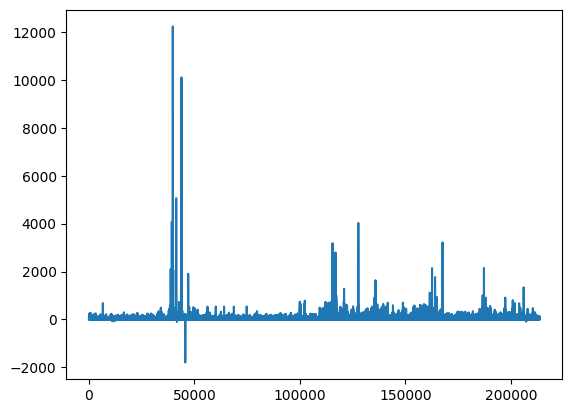

In [21]:
chosen_df['unit_sales'].plot()

In [22]:
chosen_df = chosen_df.sort_values(by=["store_nbr", "item_nbr", "date"])

# Create lagged features (1-day and 7-day unit sales)
chosen_df["lag_1"] = chosen_df.groupby(["store_nbr", "item_nbr"])["unit_sales"].shift(1)
chosen_df["lag_7"] = chosen_df.groupby(["store_nbr", "item_nbr"])["unit_sales"].shift(7)

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
chosen_df['unit_sales'] = scaler.fit_transform(chosen_df[['unit_sales']])

In [28]:
x = chosen_df[['store_nbr','item_nbr','onpromotion','class','dcoilwtico','perishable','type','cluster','month','day','is_holiday','holiday_type_encoded','lag_1','lag_7']]
y= chosen_df['unit_sales']

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [30]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()


In [31]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [41]:
predictions = model.predict(x_test)

In [45]:
y_test.values

array([-0.22994822,  0.66675236, -0.43811085, ...,  0.39453968,
       -0.32602328, -0.32602328])

In [46]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mae = mean_absolute_error(scaler.inverse_transform([y_test.values]), scaler.inverse_transform([predictions]))
mse = mean_squared_error(scaler.inverse_transform([y_test.values]),scaler.inverse_transform([predictions]))
r2 = r2_score(y_test.values, predictions)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 10.038777342648771
Mean Squared Error: 3511.335950819595
R-squared: -0.5055570093390516


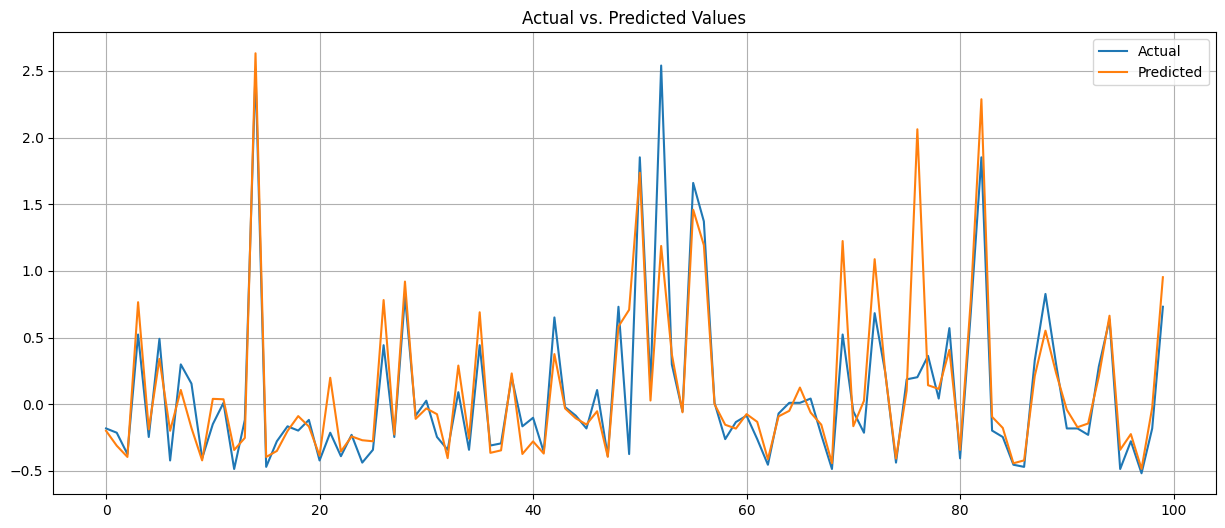

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.plot(y_test.values[800:900],label='Actual')
plt.plot(predictions[800:900],label='Predicted')
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
chosen_df.head(1)

,date,store_nbr,item_nbr,unit_sales,onpromotion,family,class,perishable,dcoilwtico,city,state,type,cluster,year,month,day,holiday_type,is_holiday,holiday_type_encoded
0,2016-01-02,1,114790,7.0,0,12,1004,0,NaN,0,0,3,13,2016,1,2,False,False,False


In [ ]:
chosen_df['dcoilwtico'].isna().sum()

62991